
## Kaggle Dataset Link
https://www.kaggle.com/competitions/titanic/data?select=train.csv

## TMDB API Usage Details

- Endpoint: /movie/popular  
- Library: requests  
- Output file: tmdb_movies.csv  
- Fields extracted:  
  - movie_title  
  - release_date  
  - rating  
  - popularity  
  - vote_count  
  - original_language  

Note: API key removed before submission for security.






Shape: (891, 12)
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   name  age     city
0  John   25       NY
1  Sara   22       LA
2  Mike   30  Chicago
   id   name department  salary
0   1  Rahul         IT   50000
1   2  Anita         HR   45000
2   3   John         IT   60000
3   4   Sara      Sales   40000
4   5   Mike         HR   42000
              movie_title release_date  rating  popularity  vote_count  \
0       The Wrecking Crew   2026-01-28   6.739    673.3304         354   
1  Greenland 2: Migration   2026-01-07   6.500    624.2323         308   
2              Zootopia 2   2025-11-26   7.627    340.0179        1515   
3       The Shadow's Edge   2025-08-16   7.176    320.1332         396   
4           The Housemaid   2025-12-18   7.093    312.9548         709   

  original_language  
0                en  
1                en  
2                en  
3       

/tmp/ipython-input-3893499768.py:124: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['Age'].fillna(clean_df['Age'].median(), inplace=True)
/tmp/ipython-input-3893499768.py:125: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

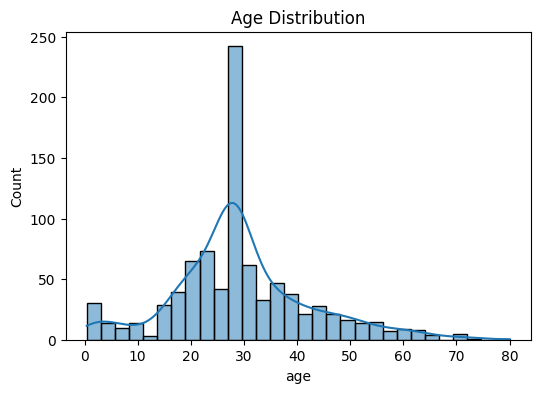

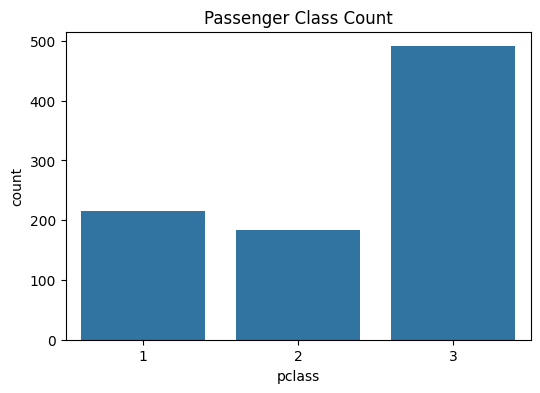

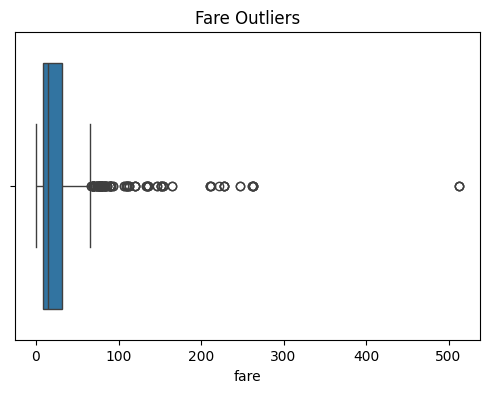

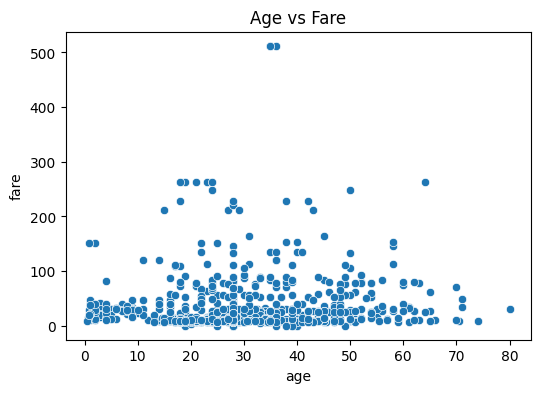

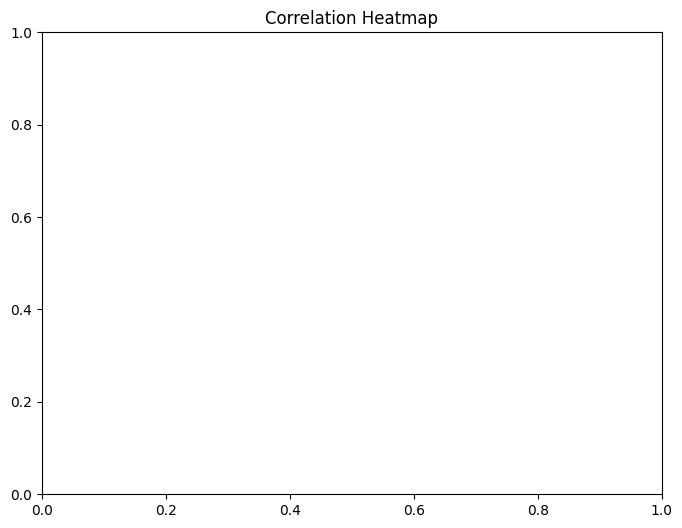

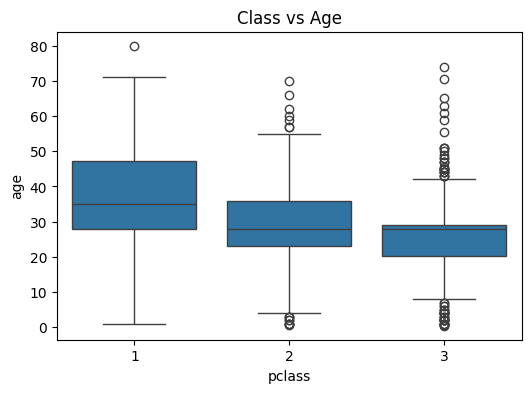

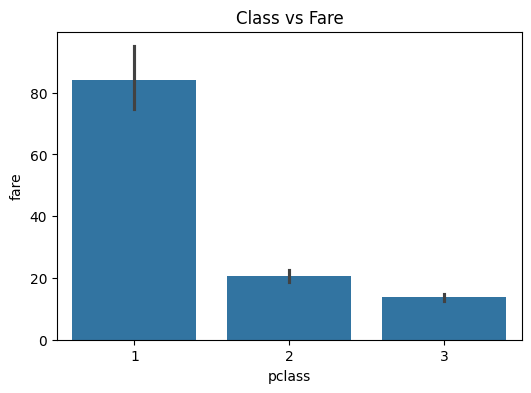

In [7]:
#PART 1 — DATA GATHERING
#TASK 1 – Load CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Kaggle CSV
df = pd.read_csv("train.csv")

print("Shape:", df.shape)
print("Columns:", df.columns)

df.head()

#TASK 2 – Load from JSON
json_df = pd.read_json("sample.json")
print(json_df)


#TASK 3 – SQLite Database
import sqlite3
import pandas as pd

conn = sqlite3.connect("sample.db")
cursor = conn.cursor()

# Create table safely
cursor.execute("""
CREATE TABLE IF NOT EXISTS employees(
id INTEGER,
name TEXT,
department TEXT,
salary INTEGER)
""")

# Clear old data to avoid duplicates
cursor.execute("DELETE FROM employees")

# Insert fresh records
cursor.executemany("""
INSERT INTO employees VALUES (?,?,?,?)
""",[
(1,'Rahul','IT',50000),
(2,'Anita','HR',45000),
(3,'John','IT',60000),
(4,'Sara','Sales',40000),
(5,'Mike','HR',42000)
])

conn.commit()

emp = pd.read_sql("SELECT * FROM employees", conn)

print(emp)

#  TASK 4 – TMDB API MINI PROJECT

import requests
import pandas as pd

# NOTE: Replace with your own key while running
API_KEY = "REMOVED_FOR_SECURITY"

# 1. Fetch popular movies
url = f"https://api.themoviedb.org/3/movie/popular?api_key={API_KEY}&language=en-US&page=1"

response = requests.get(url)
data = response.json()

# 2. Extract required fields
movies = []

for m in data['results']:
    movies.append({
        "movie_title": m.get("title"),
        "release_date": m.get("release_date"),
        "rating": m.get("vote_average"),
        "popularity": m.get("popularity"),

        # Any column of your choice (extra)
        "vote_count": m.get("vote_count"),
        "original_language": m.get("original_language")
    })

# 3. Convert to DataFrame
tmdb_df = pd.DataFrame(movies)

# 4. Save to CSV
tmdb_df.to_csv("tmdb_movies.csv", index=False)

# 5. Display output
print(tmdb_df.head())

#PART 2 — DATA PREPROCESSING & CLEANING
# TASK 5 : Understanding the Data

# 1. Dataset shape
print("Shape:", df.shape)

# 2. Column data types
print("\nData Types:\n", df.dtypes)

# 3. Identify numerical & categorical
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("\nNumerical Columns:", num_cols)
print("\nCategorical Columns:", cat_cols)

# 4. Missing values per column
print("\nMissing Values:\n", df.isnull().sum())

# 5. Basic statistics
print("\nDescribe:\n", df.describe())

#  TASK 6 : Data Cleaning

clean_df = df.copy()

# 1. Handle missing values
# Numerical → median
clean_df['Age'].fillna(clean_df['Age'].median(), inplace=True)
clean_df['Fare'].fillna(clean_df['Fare'].median(), inplace=True)

# Categorical → mode
clean_df['Embarked'].fillna(clean_df['Embarked'].mode()[0], inplace=True)
clean_df['Cabin'].fillna("Unknown", inplace=True)

# 2. Remove duplicates
clean_df.drop_duplicates(inplace=True)

# 3. Rename to lowercase snake_case
clean_df.columns = clean_df.columns.str.lower()

# 4. Fix incorrect types (if any)
clean_df['age'] = clean_df['age'].astype(float)
clean_df['fare'] = clean_df['fare'].astype(float)

print(clean_df.head())


# TASK 7 : Feature Preparation

# One Hot Encoding
clean_df = pd.get_dummies(clean_df, columns=['sex','embarked'], drop_first=True)

# Separate features & target
X = clean_df.drop(['survived','name','ticket','cabin'], axis=1)
y = clean_df['survived']

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

#  TASK 8 : Univariate

# 1. Histogram + KDE
plt.figure(figsize=(6,4))
sns.histplot(clean_df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

# 2. Count plot categorical
plt.figure(figsize=(6,4))
sns.countplot(x='pclass', data=clean_df)
plt.title("Passenger Class Count")
plt.show()

# 3. Outliers using boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=clean_df['fare'])
plt.title("Fare Outliers")
plt.show()

#  TASK 9 : Bivariate

# Numerical vs Numerical – Scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='fare', data=clean_df)
plt.title("Age vs Fare")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
num_df = clean_df.select_dtypes(include=['int64','float64'])
plt.title("Correlation Heatmap")
plt.show()

# Categorical vs Numerical – Box
plt.figure(figsize=(6,4))
sns.boxplot(x='pclass', y='age', data=clean_df)
plt.title("Class vs Age")
plt.show()

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='pclass', y='fare', data=clean_df)
plt.title("Class vs Fare")
plt.show()



### Insights & Observations

1. Age column had missing values which were filled using median.
2. Fare distribution is highly skewed with outliers.
3. Passengers in class 1 paid higher fare than class 3.
4. Strong relationship between Fare and Pclass.
5. Data quality issues found in Cabin column – many missing values.
